In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
filepath = r'D:\infosys_spring\anomaly-detection-project\dataset\anomaly_data.csv'
df = pd.read_csv(filepath)
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [4]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [5]:
df.isna().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [6]:
df['Acc'] = df['Acc'].fillna(df['Acc'].mean()) 

In [7]:
df.isnull().sum()

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64

# Z score

In [108]:
outlier = []
def detect_outlier(data):

    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [109]:
col = ['Speed','Heading','Density','Acc']
print('Outliers using Z-score')
for i in col:
    outlier_pt = detect_outlier(df[i])
    print(i,':',len(outlier_pt))
# outlier_pt = detect_outlier(df['Heading'])

Outliers using Z-score
Speed : 0
Heading : 510
Density : 650
Acc : 904


[Text(0, 0, '0'), Text(0, 0, '510'), Text(0, 0, '650'), Text(0, 0, '904')]

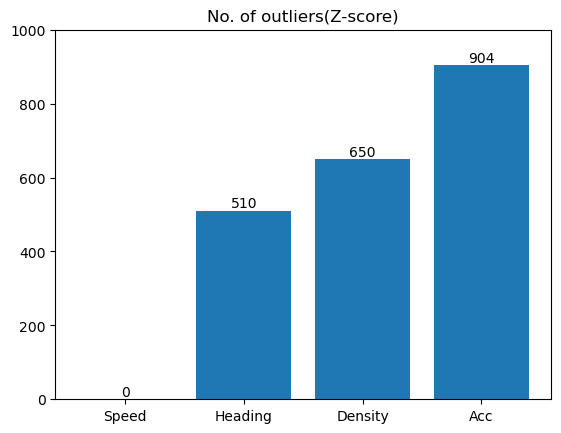

In [111]:
x = np.array(['Speed','Heading','Density','Acc'])
zscore_y = np.array([0, 510, 650, 904])

fig, ax = plt.subplots()
bar_container = ax.bar(x, zscore_y)
ax.set( title='No. of outliers(Z-score)', ylim=(0, 1000))
ax.bar_label(bar_container, fmt='{:,.0f}')

# IQR

In [103]:
# def iqr_outlier(column):
#     q1 = df['column'].quantile(0.25)
#     q3 = df['column'].quantile(0.75)
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 - 1.5 * IQR
#     return (f'for '+column+
#             'Upper bound : ' + upper_bound ,
#             'Lower bound : ' + lower_bound )

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


In [104]:
colm = ['Speed','Heading','Density','Acc']
for i in colm:
    outliers = find_outliers_IQR(df[i])

    print("number of outliers in "+i+ " : " + str(len(outliers)))

    print("max outlier value in "+i+ " : " + str(outliers.max()))

    print("min outlier value in "+i+ " : " + str(outliers.min()))

number of outliers in Speed : 0
max outlier value in Speed : nan
min outlier value in Speed : nan
number of outliers in Heading : 3461
max outlier value in Heading : 138.1621
min outlier value in Heading : 84.3241
number of outliers in Density : 286
max outlier value in Density : 9.9
min outlier value in Density : 6.39
number of outliers in Acc : 857
max outlier value in Acc : 0.4555
min outlier value in Acc : -1.0313


[Text(0, 0, '0'), Text(0, 0, '3,461'), Text(0, 0, '286'), Text(0, 0, '8,570')]

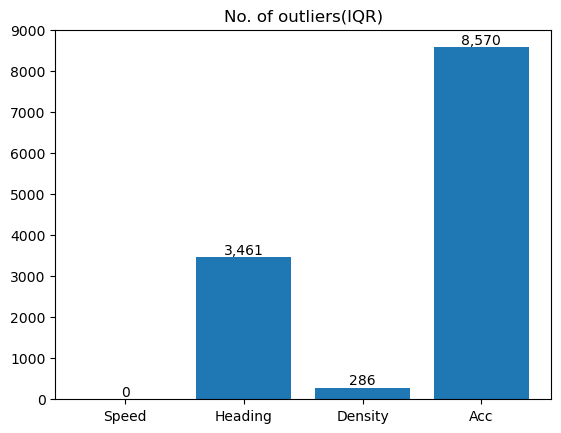

In [107]:
x = np.array(['Speed','Heading','Density','Acc'])
iqr_y = np.array([0, 3461, 286, 8570])

fig, ax = plt.subplots()
bar_container = ax.bar(x, iqr_y)
ax.set( title='No. of outliers(IQR)', ylim=(0, 9000))
ax.bar_label(bar_container, fmt='{:,.0f}')


In [86]:
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [87]:
print(df.columns)


Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')


In [90]:
X = df.drop(columns=['timestamp', 'X', 'Y', 'AgentCount',
                     'Acc','LevelOfCrowdness', 'label', 'label2', 'Severity_level'])
y = df['label'] 


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

X.head(1)

,Speed,Heading,Density
0,1.1432,89.1222,0.81


In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [16]:
# # Train the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

In [92]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [93]:
# checking the oob score
classifier_rf.oob_score_

0.9999407793438352

In [94]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# %%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [95]:
grid_search.best_score_


0.9999407863571768

In [96]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

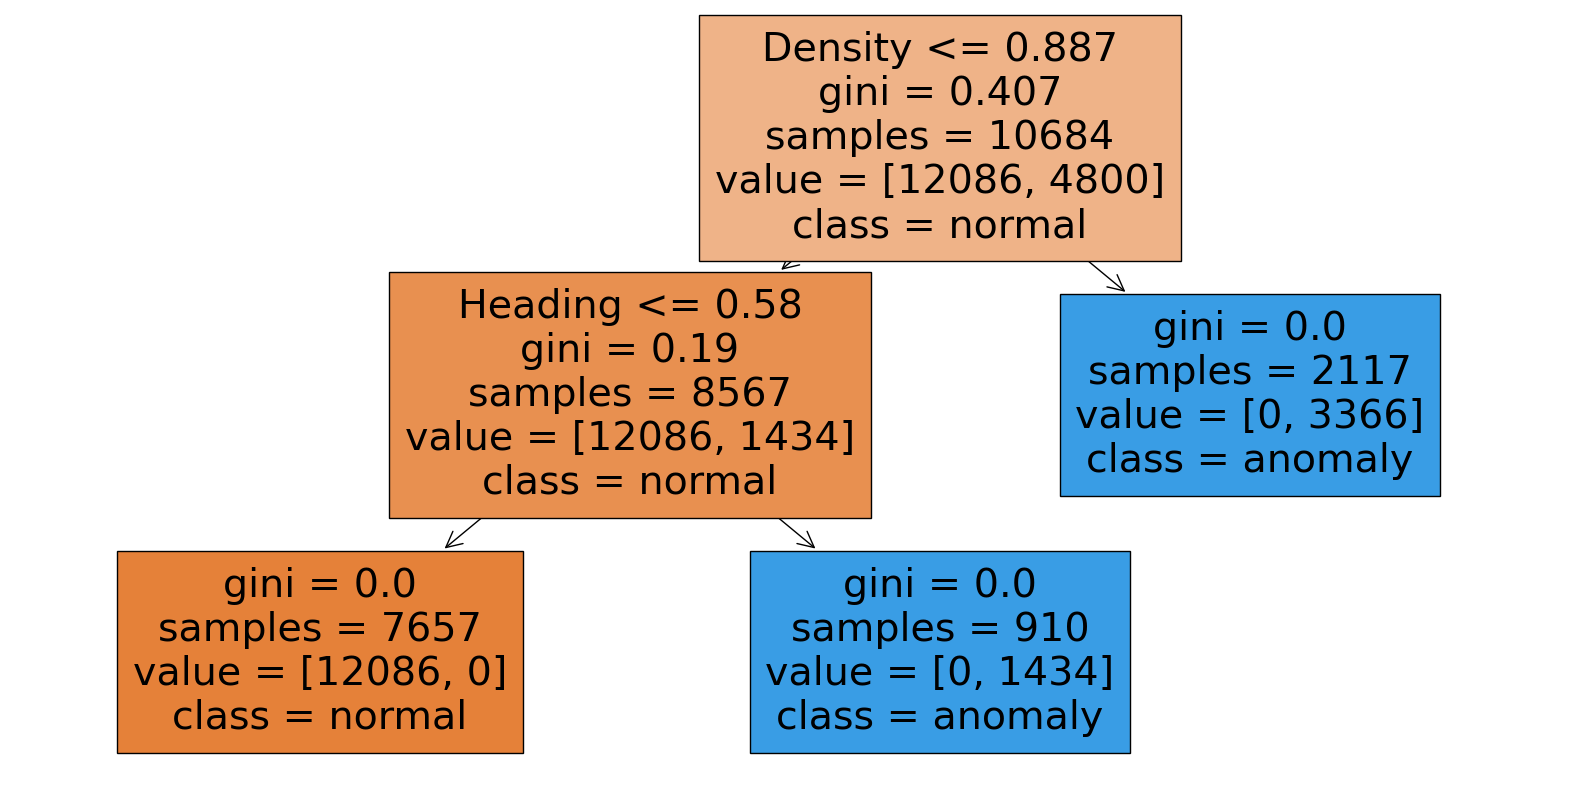

In [25]:
# from sklearn.tree import plot_tree
# # Ensure feature names are in a list format
# feature_names = X.columns.tolist()

# # Plot one of the trees from the forest
# plt.figure(figsize=(20, 10))
# plot_tree(rf_best.estimators_[5], feature_names=feature_names, class_names=['normal', 'anomaly'], filled=True)
# plt.show()

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Perform cross-validation
cross_val_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Cross-Validation Accuracy: {cross_val_accuracy}")

Accuracy: 0.9997236423932568
Precision: 0.9997237514746095
Recall: 0.9997236423932568
F1 Score: 0.9997236060214407
Cross-Validation Accuracy: 0.9998756476683937


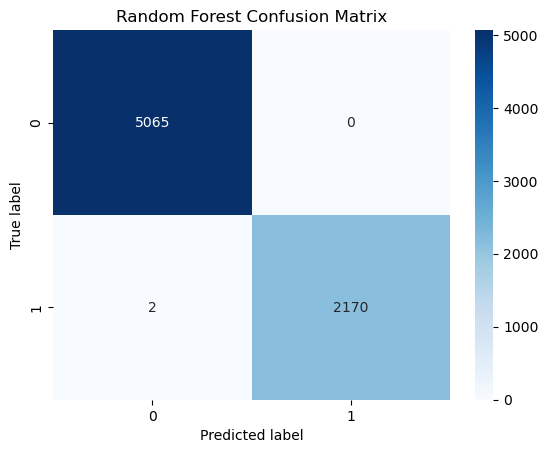

In [ ]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# # Define the models to train
# models = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
#     'K-Nearest Neighbors': KNeighborsClassifier()
# }

# # Train each model and evaluate its performance using cross-validation
# results = {}
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     cm = confusion_matrix(y_test, y_pred)
    
#     # Perform cross-validation
#     cross_val_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    
#     results[model_name] = {
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1 Score': f1,
#         'Cross-Validation Accuracy': cross_val_accuracy,
#         'Confusion Matrix': cm
#     }

In [ ]:
#     # Perform cross-validation
# cross_val_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

# results[model_name] = {
#     'Accuracy': accuracy,
#     'Precision': precision,
#     'Recall': recall,
#     'F1 Score': f1,
#     'Cross-Validation Accuracy': cross_val_accuracy,
#     'Confusion Matrix': cm
# }

# # Convert results to a DataFrame for better visualization
# results_df = pd.DataFrame(results).T

# # Print the results
# print(results_df)


In [ ]:
# # Plot the results for comparison
# results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cross-Validation Accuracy']].plot(kind='bar', figsize=(14, 8))
# plt.title('Model Comparison')
# plt.ylabel('Score')
# plt.xlabel('Model')
# plt.legend(loc='best')
# plt.show()
